# Import Libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import mnist
import keras

import warnings 

warnings.filterwarnings('ignore')

# Processing Data

In [34]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [35]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [40]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


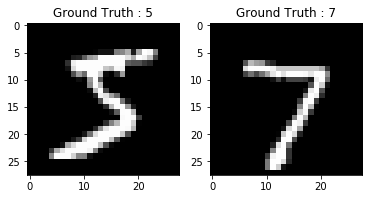

In [41]:
plt.figure(figsize=[6,6])

# display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

plt.show()

Normalize the image pixel values from [0, 255] to [-0.5, 0.5] to make the network easier to train (using smaller, centered values usually leads to better results). Also reshape each image from (28, 28) to (28, 28, 1) because Keras requires the third dimension.

In [17]:
#normalize images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

#reshape images 
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Building the Model

In [18]:
#initiate a sequential model
from keras.models import Sequential 

model = Sequential([
    
])

In [20]:
#use 3 types of layers for CNN: Convolutional, Max Pooling, and Softmax

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
    
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compiling the Model

In [21]:
model.compile('adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

# Training the Model

In [25]:
from keras.utils import to_categorical

model.fit(train_images,
          to_categorical(train_labels),
          epochs=3,
          validation_data=(test_images, to_categorical(test_labels))
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 123us/step - loss: 0.3529 - accuracy: 0.9007 - val_loss: 0.1958 - val_accuracy: 0.9442
Epoch 2/3
60000/60000 [==============================] - 7s 121us/step - loss: 0.1695 - accuracy: 0.9515 - val_loss: 0.1322 - val_accuracy: 0.9618
Epoch 3/3
60000/60000 [==============================] - 7s 119us/step - loss: 0.1262 - accuracy: 0.9642 - val_loss: 0.1103 - val_accuracy: 0.9659


In [26]:
model.save_weights('cnn.h5')

In [27]:
predictions = model.predict(test_images[:5])

#print model prediction
print(np.argmax(predictions, axis=1))

#check ground truths
print(test_labels[:5]) 

[7 2 1 0 4]
[7 2 1 0 4]
